# Boston House Price Prediction - Linear Regression Model

### Importing libraries 

In [161]:


import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#tells you to use matplotlib in the backend

In [162]:
#sklearn is a library for ML datasets
#We are loading boston house prices data set.

from sklearn.datasets import load_boston 
load_boston = load_boston()
x = load_boston.data
y = load_boston.target

data = pd.DataFrame(x, columns=load_boston.feature_names)
data["SalesPrice"] = y

In [163]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalesPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Description

In [164]:
#Y - SalePrice
print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [165]:
print(data.shape) #dimensions of the data 

#506 observations and 14 columns (regressor variables)

(506, 14)


In [166]:
data.info() 
#Structure of the data and shows us non-null value count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  SalesPrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [167]:
data.describe() 
#gives the descriptive statistics of the data set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalesPrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [168]:
data.isnull().sum()
#counts and adds the count of null values in each column
#we have no missing values in our dataset - boston house prices.

CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
SalesPrice    0
dtype: int64

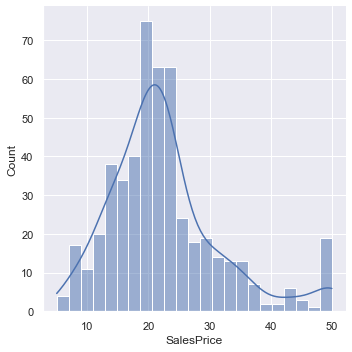

In [169]:
sns.displot(data['SalesPrice'], kde='true') 
#kde = kernel density estimates

In [170]:
#There is a little skewness and it is positive.
skew = data['SalesPrice'].skew()
kurt = data['SalesPrice'].kurt()
print(f"Skewness : {skew}") 
print(f"Kurtosis : {kurt}")

Skewness : 1.1080984082549072
Kurtosis : 1.495196944165818


<AxesSubplot:xlabel='CRIM', ylabel='SalesPrice'>

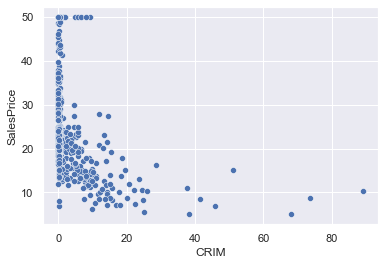

In [171]:
sns.scatterplot(x = data['CRIM'], y = data['SalesPrice'])

 The houses in areas that have less crime rate have varied prices 
 But the houses in areas that have high crime rate have low sale prices

<AxesSubplot:xlabel='AGE', ylabel='SalesPrice'>

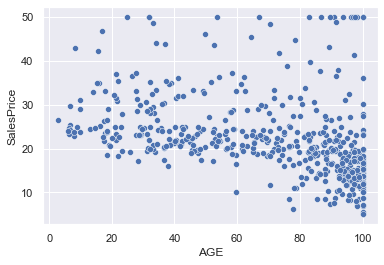

In [173]:
sns.scatterplot(x = data['AGE'], y = data['SalesPrice'])

The houses that are very old generally tend to have low Sale Price. 
Relatively new houses have high Sale Prices

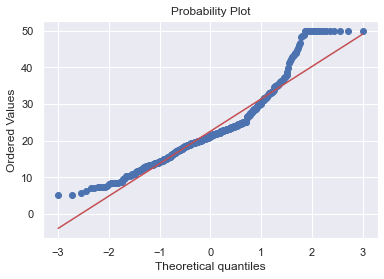

In [175]:
from scipy import stats
from scipy.stats import norm, skew
import statsmodels.api as sm

#sm.qqplot(data['SalesPrice'], marker = "o")
#plt.show()

#Another method

fig = plt.figure()
res = stats.probplot(data['SalesPrice'], plot = plt)
plt.show()


QQ Plot, the data is not exactly normally distributed. There are some outliers.

We will be taking log transformation of the Y variable.

### Transformation

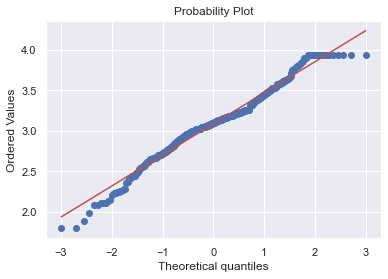

In [177]:

data['SalesPrice'] = np.log1p(data["SalesPrice"])

fig = plt.figure()
res = stats.probplot(data['SalesPrice'], plot = plt)
plt.show()

In [178]:
#The skewness is removed to a certain extent

### Correlation Between the Independent Variables

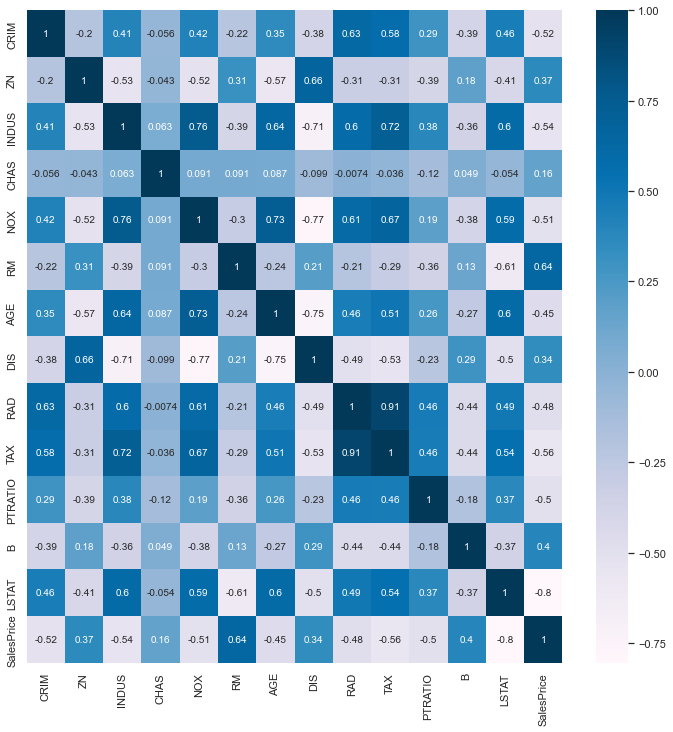

In [179]:
#We will be checking the correlation matrix to identify correlation between the independent variables

plt.figure(figsize=(12,12))
dataplot = sns.heatmap(data.corr(), cmap="PuBu", annot=True)


We can see that TAX and RAD are highly correlated at 0.91%

In [180]:
cor_target = abs(data.corr()) #absolute correlation

upper = cor_target.where(np.triu(np.ones(cor_target.shape),k=1).astype(bool))
names = [column for column in upper.columns if any(upper[column]>0.8)]
print(names)

names.remove('SalesPrice')
names

['TAX', 'SalesPrice']


['TAX']

### Removing the highly correlated columns

In [182]:
data = data.drop(['TAX'], axis = 1)
data.info() #The column tax has been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   PTRATIO     506 non-null    float64
 10  B           506 non-null    float64
 11  LSTAT       506 non-null    float64
 12  SalesPrice  506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### Model Building

In [206]:
from sklearn.model_selection import train_test_split

X = data.drop('SalesPrice', axis=1)
y = data['SalesPrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)


In [207]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 12)
(127, 12)
(379,)
(127,)


In [208]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

###  Prediction

In [252]:
prediction = lr.predict(X_test)
y_pred = pd.DataFrame(prediction)
y_pred.columns = ['Predicted']
y_tested = pd.DataFrame(y_test)
y_tested.columns = ["Actual"]

frames = [y_tested, y_pred]
result = pd.concat(frames,axis = 1, join = 'inner')
result.head().sort_values(by='Predicted')

,Actual,Predicted
107,3.063391,2.822878
37,3.091042,3.183677
78,3.100092,3.328049
102,2.975530,3.482478
15,3.039749,3.517339


In [257]:
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
print(mse)

0.04612771892275123


We can see that the mse is actually very low, which means that our prediction model is good.